<a href="https://colab.research.google.com/github/hrishabhsaini18/basic_deep_learning/blob/main/Wisconsin(Diagnostic_of_breast_cancer)_ANN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
# basic libraries for data handling and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
# importing and visualizing dataset
from sklearn.datasets import load_breast_cancer
my_data = load_breast_cancer()
my_data # the data is in dictionary type format

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [146]:
print(my_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [147]:
# change it to pandas dataframe
df = pd.DataFrame(my_data.data, columns=my_data.feature_names)
df['target'] = my_data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [148]:
# based on the dataset, we plan our model architecture
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self, input_nodes=30, hidden1=40, hidden2=20, hidden3=10, hidden4=5, out_nodes=2):
    super().__init__()
    self.fc1=nn.Linear(input_nodes, hidden1)
    self.fc2=nn.Linear(hidden1, hidden2)
    self.fc3=nn.Linear(hidden2, hidden3)
    self.fc4=nn.Linear(hidden3, hidden4)
    self.out = nn.Linear(hidden4, out_nodes)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = self.out(x)

    return (x)

torch.manual_seed(30)
model = Model()
model.eval()

Model(
  (fc1): Linear(in_features=30, out_features=40, bias=True)
  (fc2): Linear(in_features=40, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=2, bias=True)
)

In [149]:
# preparing the training dataset
X = df.drop('target', axis=1)
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=30)

X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [150]:
# defining the Loss function for training and optimizer
obj_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0075)

In [151]:
# Start training

epochs = 1000
losses = []

for i in range(epochs):
  y_eval = model.forward(X_train)
  loss = obj_fn(y_eval, y_train)
  losses.append(loss.detach().numpy())

  if i%100 == 0:
    print(f'In epoch{i}, loss:{loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In epoch0, loss:1.385442852973938
In epoch100, loss:0.16555289924144745
In epoch200, loss:0.12783372402191162
In epoch300, loss:0.12428262084722519
In epoch400, loss:0.09246940165758133
In epoch500, loss:0.08337900787591934
In epoch600, loss:0.06619392335414886
In epoch700, loss:0.0600244365632534
In epoch800, loss:0.0609591118991375
In epoch900, loss:0.05784326419234276


Text(0.5, 0, 'Epochs#')

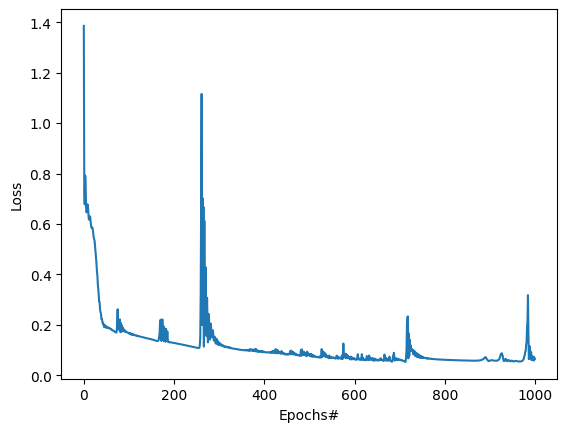

In [152]:
# plot the losses with epochs
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs#')

In [154]:
# validation error
with torch.no_grad():
  y_val_test = model.forward(X_test)
  loss = obj_fn(y_val_test, y_test)
  losses.append(loss.detach().numpy())

losses

[array(1.3854429, dtype=float32),
 array(0.73932105, dtype=float32),
 array(0.6774353, dtype=float32),
 array(0.7920243, dtype=float32),
 array(0.7519071, dtype=float32),
 array(0.6656475, dtype=float32),
 array(0.64563346, dtype=float32),
 array(0.6521821, dtype=float32),
 array(0.6777408, dtype=float32),
 array(0.6736749, dtype=float32),
 array(0.6441527, dtype=float32),
 array(0.6184197, dtype=float32),
 array(0.61723435, dtype=float32),
 array(0.62960625, dtype=float32),
 array(0.6287139, dtype=float32),
 array(0.6115954, dtype=float32),
 array(0.5929276, dtype=float32),
 array(0.5848455, dtype=float32),
 array(0.5861221, dtype=float32),
 array(0.5853164, dtype=float32),
 array(0.5768644, dtype=float32),
 array(0.560329, dtype=float32),
 array(0.5445865, dtype=float32),
 array(0.5388546, dtype=float32),
 array(0.5308498, dtype=float32),
 array(0.5092685, dtype=float32),
 array(0.4892466, dtype=float32),
 array(0.46243286, dtype=float32),
 array(0.44487283, dtype=float32),
 array(0.

In [161]:
true_positives = 0

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val_test = model(data)

    # labeling classes
    if y_test[i]==0:
      label = 'malignant'
    else:
      label = 'benign'

    if y_val_test.argmax().item() == 0:
      true_label = 'malignant'
    else:
      true_label = 'benign'

    # check what model returns
    print(f'{i+1}-->{str(y_val_test)}; True:{label}, Predict:{true_label}')

    if y_val_test.argmax().item() == y_test[i]:
      true_positives+=1

accuracy = (true_positives / len(y_test)) * 100
print(f'\n Correctly labelled: {true_positives} out of {len(y_test)}, i.e. {accuracy:.2f}% accuracy')

1-->tensor([ 6.3321, -0.4608]); True:malignant, Predict:malignant
2-->tensor([3.5846, 0.2290]); True:malignant, Predict:malignant
3-->tensor([-3.9074,  2.0830]); True:benign, Predict:benign
4-->tensor([ 4.1252, -0.4749]); True:malignant, Predict:malignant
5-->tensor([-4.2753,  2.3082]); True:benign, Predict:benign
6-->tensor([25.9845, -6.5986]); True:malignant, Predict:malignant
7-->tensor([-3.8641,  2.9034]); True:benign, Predict:benign
8-->tensor([-4.2261,  2.0614]); True:benign, Predict:benign
9-->tensor([-5.0784,  2.7598]); True:benign, Predict:benign
10-->tensor([-4.4858,  3.0795]); True:benign, Predict:benign
11-->tensor([-3.2505,  2.5934]); True:benign, Predict:benign
12-->tensor([18.5812, -4.6045]); True:malignant, Predict:malignant
13-->tensor([-4.8373,  2.5254]); True:benign, Predict:benign
14-->tensor([ 8.0860, -1.7776]); True:malignant, Predict:malignant
15-->tensor([23.7625, -6.0001]); True:malignant, Predict:malignant
16-->tensor([-0.4150,  1.9120]); True:malignant, Predi

In [163]:
# torch.save(model.state_dict(),'Brst_cancer_model1.pt')